# Advanced MLP
- Advanced techniques for training neural networks
    - Weight Initialization
    - Nonlinearity (Activation function)
    - Optimizers
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [62]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

## Load Dataset
- MNIST dataset
- source: http://yann.lecun.com/exdb/mnist/

In [63]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

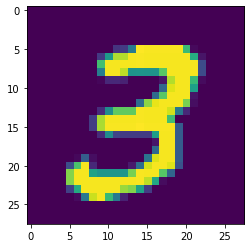

Label:  3


In [64]:
plt.imshow(X_train[7])    # show first number in the dataset
plt.show()
print('Label: ', y_train[7])

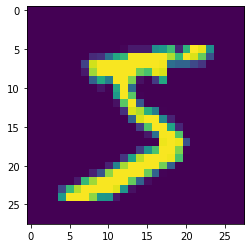

Label:  5


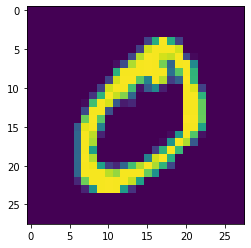

Label:  0


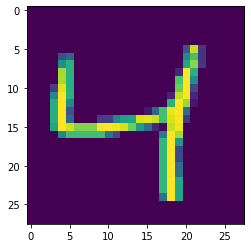

Label:  4


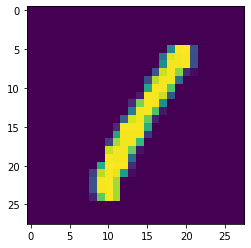

Label:  1


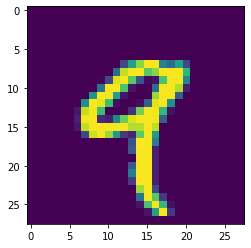

Label:  9


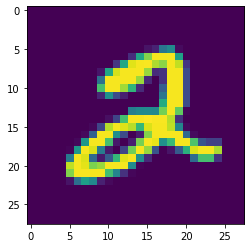

Label:  2


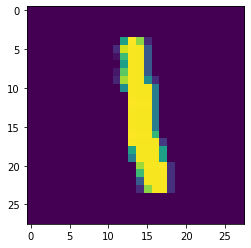

Label:  1


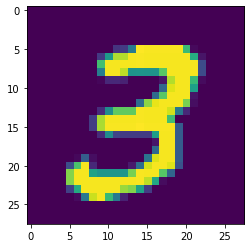

Label:  3


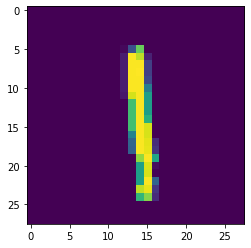

Label:  1


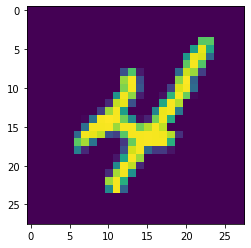

Label:  4


In [65]:
for i in range(0,10):
    plt.imshow(X_train[i])    # show first number in the dataset
    plt.show()
    print('Label: ', y_train[i])

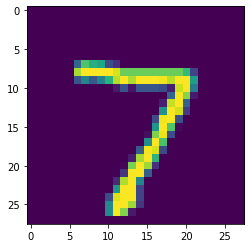

Label:  7


In [66]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [67]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [68]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [69]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [70]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


## Basic MLP model
- Naive MLP model without any alterations

In [133]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

In [72]:
model = Sequential()

In [73]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [74]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [75]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 0)

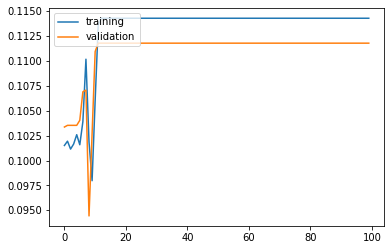

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [77]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.2987 - accuracy: 0.1135


In [78]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization
- Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree
- He normal or Xavier normal initialization schemes are SOTA at the moment
- Doc: https://keras.io/initializers/

In [79]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [80]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

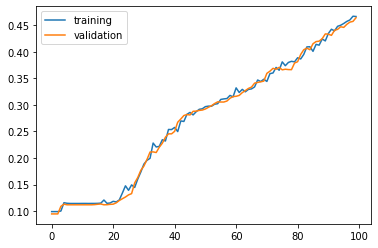

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [82]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.9370 - accuracy: 0.4609


In [83]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4609000086784363


## 2. Nonlinearity (Activation function)
- Sigmoid functions suffer from gradient vanishing problem, making training slower
- There are many choices apart from sigmoid and tanh; try many of them!
    - **'relu'** (rectified linear unit) is one of the most popular ones
    - **'selu'** (scaled exponential linear unit) is one of the most recent ones
- Doc: https://keras.io/activations/

<img src="http://cs231n.github.io/assets/nn1/sigmoid.jpeg" style="width: 400px"/>
<center> **Sigmoid Activation Function** </center>
<img src="http://cs231n.github.io/assets/nn1/relu.jpeg" style="width: 400px"/>
<center> **Relu Activation Function** </center>
<img src="https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png" style="width: 400px"/>
<center> **Comparision of activation** </center>

In [84]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [85]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

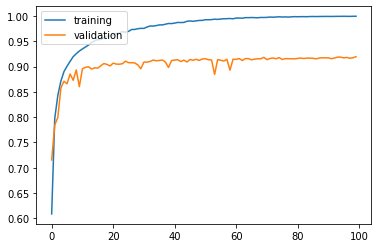

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [87]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4987 - accuracy: 0.9196


In [88]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9196000099182129


## 3. Optimizers
- Many variants of SGD are proposed and employed nowadays
- One of the most popular ones are Adam (Adaptive Moment Estimation)
- Doc: https://keras.io/optimizers/

<img src="http://cs231n.github.io/assets/nn3/opt2.gif" style="width: 400px"/>
<br><center> **Relative convergence speed of different optimizers** </center></br>

In [89]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))  
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [90]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

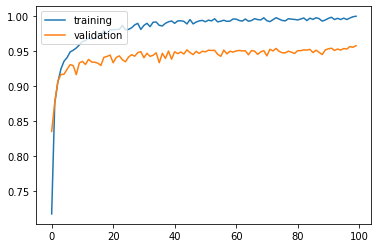

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [92]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.9574


In [93]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9574000239372253


## 4. Batch Normalization
- Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective
- Normalize each mini-batch before nonlinearity
- Doc: https://keras.io/optimizers/

<img src="https://raw.githubusercontent.com/torch/torch.github.io/master/blog/_posts/images/resnets_modelvariants.png" style="width: 500px"/>

<br> Batch normalization layer is usually inserted after dense/convolution and before nonlinearity

In [94]:
from keras.layers import BatchNormalization

In [95]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [96]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

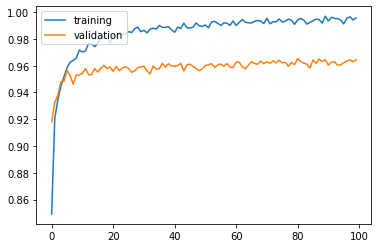

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [98]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9666


In [99]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9666000008583069


## 5. Dropout (Regularization)
- Dropout is one of powerful ways to prevent overfitting
- The idea is simple. It is disconnecting some (randomly selected) neurons in each layer
- The probability of each neuron to be disconnected, namely 'Dropout rate', has to be designated
- Doc: https://keras.io/layers/core/#dropout

<img src="https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-62-638.jpg?cb=1430740006" style="width: 500px"/>

In [100]:
from keras.layers import Dropout

In [101]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('selu'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('selu'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('selu'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [102]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 1)

Epoch 1/100
434/434 [==============================] - 2s 3ms/step - loss: 14.3077 - accuracy: 0.1316 - val_loss: 2.0385 - val_accuracy: 0.2306
Epoch 2/100
434/434 [==============================] - 1s 3ms/step - loss: 2.4597 - accuracy: 0.1868 - val_loss: 1.7303 - val_accuracy: 0.3438
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 2.0353 - accuracy: 0.3035 - val_loss: 1.4462 - val_accuracy: 0.4416
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 1.7169 - accuracy: 0.3891 - val_loss: 1.3514 - val_accuracy: 0.4662
Epoch 5/100
434/434 [==============================] - 1s 3ms/step - loss: 1.6322 - accuracy: 0.3980 - val_loss: 1.2950 - val_accuracy: 0.4833
Epoch 6/100
434/434 [==============================] - 1s 3ms/step - loss: 1.5492 - accuracy: 0.4353 - val_loss: 1.1457 - val_accuracy: 0.5584
Epoch 7/100
434/434 [==============================] - 1s 3ms/step - loss: 1.4496 - accuracy: 0.4791 - val_loss: 0.9790 - val_accuracy: 0.614

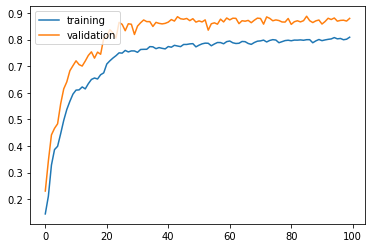

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Validation results does not improve since it did not show signs of overfitting, yet.
<br> Hence, the key takeaway message is that apply dropout when you see a signal of overfitting.

In [104]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8821


In [105]:
print('Test accuracy: ', results[1])

Test accuracy:  0.882099986076355


## 6. Model Ensemble
- Model ensemble is a reliable and promising way to boost performance of the model
- Usually create 8 to 10 independent networks and merge their results
- Here, we resort to scikit-learn API, **VotingClassifier**
- Doc: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRs1CBSEtpp5yj6SJ5K_nHd1FNfyEYa9KLjWfoMY_v7ARTq3tdpVw" style="width: 300px"/>

In [106]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [107]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [140]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('selu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())
    model.add(Activation('selu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    Nadam = optimizers.Nadam(lr = 0.001)
    model.compile(optimizer = Nadam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [155]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model1._estimator_type="classifier"
model2 = KerasClassifier(build_fn = mlp_model, epochs = 50, verbose = 0)
model2._estimator_type="classifier"
model3 = KerasClassifier(build_fn = mlp_model, epochs = 30, verbose = 0)
model3._estimator_type="classifier"

In [156]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [ ]:
ensemble_clf.fit(X_train, y_train)

In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Test accuracy:', accuracy_score(y_pred, y_test))